In [0]:
# Initialize Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("FraudDetectionModel").getOrCreate()

# Load dataset from your table
df = spark.table("likhitha1.default.travel_transportation_dataset")

# Show schema and few records
df.printSchema()
display(df)


root
 |-- ride_id: long (nullable = true)
 |-- ride_datetime: timestamp (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- drop_location: string (nullable = true)
 |-- distance_km: double (nullable = true)
 |-- ride_duration_min: double (nullable = true)
 |-- base_fare: double (nullable = true)
 |-- demand_level: string (nullable = true)
 |-- weather: string (nullable = true)
 |-- event_nearby: string (nullable = true)
 |-- traffic_level: string (nullable = true)
 |-- driver_id: long (nullable = true)
 |-- rider_id: long (nullable = true)
 |-- driver_rating: double (nullable = true)
 |-- rider_rating: double (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- ride_status: string (nullable = true)
 |-- total_fare: double (nullable = true)
 |-- is_fraudulent: long (nullable = true)
 |-- predicted_demand_next_hour: long (nullable = true)



ride_id,ride_datetime,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_id,rider_id,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour
1,2025-01-08T02:37:00.000Z,Station,IT Park,10.54,21.3,68.36,Low,Clear,No,Medium,1054,2470,4.28,4.17,Cash,Completed,75.46923280511291,0,427
2,2025-01-28T20:09:00.000Z,University,University,14.64,44.5,66.48,Medium,Foggy,No,Low,1099,2301,4.36,4.9,Cash,No-show,106.32693704520217,0,778
3,2025-01-10T11:41:00.000Z,Mall,IT Park,22.58,57.5,54.51,Medium,Rainy,No,Low,1094,2077,4.12,3.97,Wallet,Completed,95.16749617936469,0,733
4,2025-01-05T17:23:00.000Z,University,IT Park,26.28,44.7,77.42,Medium,Clear,No,Medium,1076,2009,4.25,4.81,UPI,Completed,123.56742175763449,0,706
5,2025-01-26T12:42:00.000Z,University,Station,13.58,52.5,83.1,High,Foggy,Yes,Low,1035,2024,3.19,4.67,Cash,Completed,178.93131409889895,0,124
6,2025-01-30T14:09:00.000Z,Downtown,IT Park,2.27,5.1,31.02,Low,Clear,No,High,1011,2015,4.9,3.29,Wallet,No-show,44.56325752944946,0,628
7,2025-01-20T19:55:00.000Z,Mall,Mall,5.69,44.5,44.51,Low,Hot,No,Low,1061,2164,4.58,4.42,UPI,Completed,63.46779318292361,0,525
8,2025-01-18T15:51:00.000Z,Mall,IT Park,1.6,50.6,79.93,Medium,Foggy,Yes,High,1044,2013,3.75,3.87,UPI,Completed,124.3760104489634,0,128
9,2025-01-15T13:40:00.000Z,Mall,IT Park,19.94,7.2,57.06,Medium,Clear,No,Medium,1068,2347,4.13,3.5,Cash,Completed,104.87997845522034,0,422
10,2025-01-10T05:59:00.000Z,University,IT Park,10.64,52.9,76.37,Medium,Foggy,No,Medium,1025,2172,3.09,4.37,Wallet,Completed,117.45383079454007,0,952


In [0]:
# Count fraud vs genuine rides
display(df.groupBy("is_fraudulent").count())


is_fraudulent,count
0,970
1,30


In [0]:
import pandas as pd

# Convert to Pandas
pdf = df.toPandas()

# Drop unnecessary columns
pdf = pdf.drop(columns=["ride_id", "rider_id", "driver_id", "ride_datetime"], errors="ignore")

# One-hot encode categorical variables
pdf_encoded = pd.get_dummies(pdf, columns=["payment_method", "traffic_level", "demand_level", "weather"], drop_first=True)


In [0]:
# Features and target
X = pdf_encoded.drop(columns=["is_fraudulent"])
y = pdf_encoded["is_fraudulent"]


In [0]:
import pandas as pd

# Combine X and y for encoding if needed
data = pd.concat([X, y], axis=1)

# One-hot encode categorical columns in X
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluateprint("🔹 Accuracy:", round(accuracy_score(y_test, y_pred), 3))
from sklearn.metrics import classification_report, accuracy_score
print("✅ Model trained successfully!")
print("🔹 Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Model trained successfully!
🔹 Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200



/databricks/python/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/databricks/python/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/databricks/python/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [0]:
# ----------------------------------------
# Recreate preprocessing for Fraud Detection
# ----------------------------------------

import pandas as pd

# Load Spark DataFrame
df = spark.table("likhitha1.default.travel_transportation_dataset")

# Convert Spark DataFrame to Pandas
pdf = df.toPandas()

# Drop unnecessary columns
pdf = pdf.drop(columns=["ride_id", "rider_id", "driver_id", "ride_datetime"], errors="ignore")

# One-hot encode categorical variables
pdf_encoded = pd.get_dummies(pdf, columns=["payment_method", "traffic_level", "demand_level", "weather"], drop_first=True)

print("✅ Preprocessing complete! pdf_encoded is ready.")
print("Shape of encoded data:", pdf_encoded.shape)
pdf_encoded.head()


✅ Preprocessing complete! pdf_encoded is ready.
Shape of encoded data: (1000, 22)


,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,event_nearby,driver_rating,rider_rating,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour,payment_method_Credit Card,payment_method_UPI,payment_method_Wallet,traffic_level_Low,traffic_level_Medium,demand_level_Low,demand_level_Medium,weather_Foggy,weather_Hot,weather_Rainy
0,Station,IT Park,10.54,21.3,68.36,No,4.28,4.17,Completed,75.469233,0,427,False,False,False,False,True,True,False,False,False,False
1,University,University,14.64,44.5,66.48,No,4.36,4.90,No-show,106.326937,0,778,False,False,False,True,False,False,True,True,False,False
2,Mall,IT Park,22.58,57.5,54.51,No,4.12,3.97,Completed,95.167496,0,733,False,False,True,True,False,False,True,False,False,True
3,University,IT Park,26.28,44.7,77.42,No,4.25,4.81,Completed,123.567422,0,706,False,True,False,False,True,False,True,False,False,False
4,University,Station,13.58,52.5,83.10,Yes,3.19,4.67,Completed,178.931314,0,124,False,False,False,True,False,False,False,True,False,False


In [0]:
import pandas as pd

# Convert Spark to Pandas
pdf = df.toPandas()

# Drop unnecessary ID/time columns
pdf = pdf.drop(columns=["ride_id", "rider_id", "driver_id", "ride_datetime"], errors="ignore")

# Preview data
pdf.head()


,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour
0,Station,IT Park,10.54,21.3,68.36,Low,Clear,No,Medium,4.28,4.17,Cash,Completed,75.469233,0,427
1,University,University,14.64,44.5,66.48,Medium,Foggy,No,Low,4.36,4.90,Cash,No-show,106.326937,0,778
2,Mall,IT Park,22.58,57.5,54.51,Medium,Rainy,No,Low,4.12,3.97,Wallet,Completed,95.167496,0,733
3,University,IT Park,26.28,44.7,77.42,Medium,Clear,No,Medium,4.25,4.81,UPI,Completed,123.567422,0,706
4,University,Station,13.58,52.5,83.10,High,Foggy,Yes,Low,3.19,4.67,Cash,Completed,178.931314,0,124


In [0]:
# Encode categorical variables for ML
pdf_encoded = pd.get_dummies(
    pdf,
    columns=["payment_method", "traffic_level", "demand_level", "weather"],
    drop_first=True
)

print("✅ Encoding complete. Total columns:", len(pdf_encoded.columns))
pdf_encoded.head()


✅ Encoding complete. Total columns: 22


,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,event_nearby,driver_rating,rider_rating,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour,payment_method_Credit Card,payment_method_UPI,payment_method_Wallet,traffic_level_Low,traffic_level_Medium,demand_level_Low,demand_level_Medium,weather_Foggy,weather_Hot,weather_Rainy
0,Station,IT Park,10.54,21.3,68.36,No,4.28,4.17,Completed,75.469233,0,427,False,False,False,False,True,True,False,False,False,False
1,University,University,14.64,44.5,66.48,No,4.36,4.90,No-show,106.326937,0,778,False,False,False,True,False,False,True,True,False,False
2,Mall,IT Park,22.58,57.5,54.51,No,4.12,3.97,Completed,95.167496,0,733,False,False,True,True,False,False,True,False,False,True
3,University,IT Park,26.28,44.7,77.42,No,4.25,4.81,Completed,123.567422,0,706,False,True,False,False,True,False,True,False,False,False
4,University,Station,13.58,52.5,83.10,Yes,3.19,4.67,Completed,178.931314,0,124,False,False,False,True,False,False,False,True,False,False


In [0]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = pdf_encoded.drop(columns=["is_fraudulent"])
y = pdf_encoded["is_fraudulent"]

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train/Test Split Done.")
print("Training samples:", X_train.shape[0], "| Testing samples:", X_test.shape[0])


✅ Train/Test Split Done.
Training samples: 800 | Testing samples: 200


In [0]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
# Load Spark DataFrame
df = spark.table("likhitha1.default.travel_transportation_dataset")

# Drop unnecessary ID/time columns
df = df.drop("ride_id", "rider_id", "driver_id", "ride_datetime")

# Display to confirm
display(df)


pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour
Station,IT Park,10.54,21.3,68.36,Low,Clear,No,Medium,4.28,4.17,Cash,Completed,75.46923280511291,0,427
University,University,14.64,44.5,66.48,Medium,Foggy,No,Low,4.36,4.9,Cash,No-show,106.32693704520217,0,778
Mall,IT Park,22.58,57.5,54.51,Medium,Rainy,No,Low,4.12,3.97,Wallet,Completed,95.16749617936469,0,733
University,IT Park,26.28,44.7,77.42,Medium,Clear,No,Medium,4.25,4.81,UPI,Completed,123.56742175763449,0,706
University,Station,13.58,52.5,83.1,High,Foggy,Yes,Low,3.19,4.67,Cash,Completed,178.93131409889895,0,124
Downtown,IT Park,2.27,5.1,31.02,Low,Clear,No,High,4.9,3.29,Wallet,No-show,44.56325752944946,0,628
Mall,Mall,5.69,44.5,44.51,Low,Hot,No,Low,4.58,4.42,UPI,Completed,63.46779318292361,0,525
Mall,IT Park,1.6,50.6,79.93,Medium,Foggy,Yes,High,3.75,3.87,UPI,Completed,124.3760104489634,0,128
Mall,IT Park,19.94,7.2,57.06,Medium,Clear,No,Medium,4.13,3.5,Cash,Completed,104.87997845522034,0,422
University,IT Park,10.64,52.9,76.37,Medium,Foggy,No,Medium,3.09,4.37,Wallet,Completed,117.45383079454007,0,952


In [0]:
from pyspark.ml.feature import StringIndexer

# List categorical columns
categorical_cols = ["payment_method", "traffic_level", "demand_level", "weather"]

# Index them
indexers = [
    StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep")
    for col in categorical_cols
]

from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df).transform(df)

display(df_indexed)


pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour,payment_method_index,traffic_level_index,demand_level_index,weather_index
Station,IT Park,10.54,21.3,68.36,Low,Clear,No,Medium,4.28,4.17,Cash,Completed,75.46923280511291,0,427,0.0,0.0,1.0,1.0
University,University,14.64,44.5,66.48,Medium,Foggy,No,Low,4.36,4.9,Cash,No-show,106.32693704520217,0,778,0.0,1.0,0.0,2.0
Mall,IT Park,22.58,57.5,54.51,Medium,Rainy,No,Low,4.12,3.97,Wallet,Completed,95.16749617936469,0,733,1.0,1.0,0.0,0.0
University,IT Park,26.28,44.7,77.42,Medium,Clear,No,Medium,4.25,4.81,UPI,Completed,123.56742175763449,0,706,3.0,0.0,0.0,1.0
University,Station,13.58,52.5,83.1,High,Foggy,Yes,Low,3.19,4.67,Cash,Completed,178.93131409889895,0,124,0.0,1.0,2.0,2.0
Downtown,IT Park,2.27,5.1,31.02,Low,Clear,No,High,4.9,3.29,Wallet,No-show,44.56325752944946,0,628,1.0,2.0,1.0,1.0
Mall,Mall,5.69,44.5,44.51,Low,Hot,No,Low,4.58,4.42,UPI,Completed,63.46779318292361,0,525,3.0,1.0,1.0,3.0
Mall,IT Park,1.6,50.6,79.93,Medium,Foggy,Yes,High,3.75,3.87,UPI,Completed,124.3760104489634,0,128,3.0,2.0,0.0,2.0
Mall,IT Park,19.94,7.2,57.06,Medium,Clear,No,Medium,4.13,3.5,Cash,Completed,104.87997845522034,0,422,0.0,0.0,0.0,1.0
University,IT Park,10.64,52.9,76.37,Medium,Foggy,No,Medium,3.09,4.37,Wallet,Completed,117.45383079454007,0,952,1.0,0.0,0.0,2.0


In [0]:
# List of feature columns
feature_cols = [
    "distance_km", "ride_duration_min", "base_fare", "total_fare",
    "driver_rating", "rider_rating",
    "payment_method_index", "traffic_level_index", "demand_level_index", "weather_index"
]

# Assemble all features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
train_df = assembler.transform(df_indexed)

# Rename label column
train_df = train_df.withColumnRenamed("is_fraudulent", "label")

train_df.select("features", "label").show(5, truncate=False)


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the fitted Spark model
importances = rf_model.featureImportances.toArray()
feature_cols = [
    "distance_km", "ride_duration_min", "base_fare", "total_fare",
    "driver_rating", "rider_rating",
    "payment_method_index", "traffic_level_index", "demand_level_index", "weather_index"
]

imp_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
})
imp_df = imp_df.sort_values(
    by="Importance",
    ascending=False
).head(5)

plt.figure(figsize=(5,3))
plt.barh(
    imp_df["Feature"][::-1],
    imp_df["Importance"][::-1],
    color="teal"
)
plt.title("Top 5 Important Features", fontsize=11, fontweight="bold")
plt.xlabel("Importance", fontsize=9)
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-8830117178075435>, line 5
      2 import matplotlib.pyplot as plt
      4 # Get feature importances from the fitted Spark model
----> 5 importances = rf_model.featureImportances.toArray()
      6 feature_cols = [
      7     "distance_km", "ride_duration_min", "base_fare", "total_fare",
      8     "driver_rating", "rider_rating",
      9     "payment_method_index", "traffic_level_index", "demand_level_index", "weather_index"
     10 ]
     12 imp_df = pd.DataFrame({
     13     "Feature": feature_cols,
     14     "Importance": importances
     15 })

AttributeError: 'RandomForestClassifier' object has no attribute 'featureImportances'

In [0]:
# ----------------------------------------
# FRAUD DETECTION MODEL - FEATURE IMPORTANCE VISUALIZATION
# ----------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# ✅ Get feature importances from the trained Spark model
importances = rf_model.featureImportances.toArray()

# ✅ List the same feature columns used in your VectorAssembler
feature_cols = [
    "distance_km", "ride_duration_min", "base_fare", "total_fare",
    "driver_rating", "rider_rating",
    "payment_method_index", "traffic_level_index", "demand_level_index", "weather_index"
]

# ✅ Combine into a Pandas DataFrame
imp_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# ✅ Display table (optional)
display(imp_df.head(5))

# ✅ Small Visual (Mini Bar Chart)
plt.figure(figsize=(5,3))
plt.barh(imp_df["Feature"].head(5)[::-1], imp_df["Importance"].head(5)[::-1],
         color="teal", edgecolor="black")
plt.title("Top 5 Important Features", fontsize=11, fontweight="bold")
plt.xlabel("Importance", fontsize=9)
plt.tight_layout()
plt.show()


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-8830117178075433>, line 9
      6 import matplotlib.pyplot as plt
      8 # ✅ Get feature importances from the trained Spark model
----> 9 importances = rf_model.featureImportances.toArray()
     11 # ✅ List the same feature columns used in your VectorAssembler
     12 feature_cols = [
     13     "distance_km", "ride_duration_min", "base_fare", "total_fare",
     14     "driver_rating", "rider_rating",
     15     "payment_method_index", "traffic_level_index", "demand_level_index", "weather_index"
     16 ]

AttributeError: 'RandomForestClassifier' object has no attribute 'featureImportances'

In [0]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# Define categorical columns
categorical_cols = ["payment_method", "traffic_level", "demand_level", "weather"]

# Create StringIndexers for each column
indexers = [
    StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep")
    for col in categorical_cols
]

# Build pipeline
pipeline = Pipeline(stages=indexers)

# Fit and transform the data
indexed_df = pipeline.fit(spark_df).transform(spark_df)

display(indexed_df.select("payment_method", "payment_method_index").limit(5))


---------------------------------------------------------------------------
SparkException                            Traceback (most recent call last)
File <command-8830117178075441>, line 17
     14 pipeline = Pipeline(stages=indexers)
     16 # Fit and transform the data
---> 17 indexed_df = pipeline.fit(spark_df).transform(spark_df)
     19 display(indexed_df.select("payment_method", "payment_method_index").limit(5))

File /databricks/python_shell/lib/dbruntime/MLWorkloadsInstrumentation/_pyspark.py:30, in _create_patch_function.<locals>.patched_method(self, *args, **kwargs)
     28 call_succeeded = False
     29 try:
---> 30     result = original_method(self, *args, **kwargs)
     31     call_succeeded = True
     32     return result

File /databricks/python/lib/python3.12/site-packages/pyspark/ml/base.py:203, in Estimator.fit(self, dataset, params)
    201         return self.copy(params)._fit(dataset)
    202     else:
--> 203         return self._fit(dataset)
    204 else:
   

In [0]:
# Load dataset and print column names
df = spark.table("likhitha1.default.travel_transportation_dataset")
print(df.columns)
display(df.limit(5))


['ride_id', 'ride_datetime', 'pickup_location', 'drop_location', 'distance_km', 'ride_duration_min', 'base_fare', 'demand_level', 'weather', 'event_nearby', 'traffic_level', 'driver_id', 'rider_id', 'driver_rating', 'rider_rating', 'payment_method', 'ride_status', 'total_fare', 'is_fraudulent', 'predicted_demand_next_hour']


ride_id,ride_datetime,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_id,rider_id,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour
1,2025-01-08T02:37:00.000Z,Station,IT Park,10.54,21.3,68.36,Low,Clear,No,Medium,1054,2470,4.28,4.17,Cash,Completed,75.46923280511291,0,427
2,2025-01-28T20:09:00.000Z,University,University,14.64,44.5,66.48,Medium,Foggy,No,Low,1099,2301,4.36,4.9,Cash,No-show,106.32693704520217,0,778
3,2025-01-10T11:41:00.000Z,Mall,IT Park,22.58,57.5,54.51,Medium,Rainy,No,Low,1094,2077,4.12,3.97,Wallet,Completed,95.16749617936469,0,733
4,2025-01-05T17:23:00.000Z,University,IT Park,26.28,44.7,77.42,Medium,Clear,No,Medium,1076,2009,4.25,4.81,UPI,Completed,123.56742175763449,0,706
5,2025-01-26T12:42:00.000Z,University,Station,13.58,52.5,83.1,High,Foggy,Yes,Low,1035,2024,3.19,4.67,Cash,Completed,178.93131409889895,0,124


In [0]:
spark_df = df


In [0]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

# Define only columns that exist in your data
categorical_cols = ["payment_method", "traffic_level", "demand_level", "weather"]

# Create StringIndexers for each categorical column
indexers = [
    StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep")
    for col in categorical_cols
]

# Build and fit the pipeline
pipeline = Pipeline(stages=indexers)

indexed_df = pipeline.fit(spark_df).transform(spark_df)

display(indexed_df.select("payment_method", "payment_method_index").limit(5))


payment_method,payment_method_index
Cash,0.0
Cash,0.0
Wallet,1.0
UPI,3.0
Cash,0.0


In [0]:
from pyspark.ml.feature import VectorAssembler

feature_cols = [
    "distance_km", "ride_duration_min", "base_fare", "total_fare",
    "driver_rating", "rider_rating",
    "payment_method_index", "traffic_level_index", "demand_level_index", "weather_index"
]

assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features"
)

train_df = assembler.transform(indexed_df).withColumnRenamed("is_fraudulent", "label")

display(train_df.select("features", "label").limit(5))


features,label
"{""type"":""1"",""size"":null,""indices"":null,""values"":[""10.54"",""21.3"",""68.36"",""75.46923280511291"",""4.28"",""4.17"",""0.0"",""0.0"",""1.0"",""1.0""]}",0
"{""type"":""1"",""size"":null,""indices"":null,""values"":[""14.64"",""44.5"",""66.48"",""106.32693704520217"",""4.36"",""4.9"",""0.0"",""1.0"",""0.0"",""2.0""]}",0
"{""type"":""1"",""size"":null,""indices"":null,""values"":[""22.58"",""57.5"",""54.51"",""95.16749617936469"",""4.12"",""3.97"",""1.0"",""1.0"",""0.0"",""0.0""]}",0
"{""type"":""1"",""size"":null,""indices"":null,""values"":[""26.28"",""44.7"",""77.42"",""123.56742175763449"",""4.25"",""4.81"",""3.0"",""0.0"",""0.0"",""1.0""]}",0
"{""type"":""1"",""size"":null,""indices"":null,""values"":[""13.58"",""52.5"",""83.1"",""178.93131409889895"",""3.19"",""4.67"",""0.0"",""1.0"",""2.0"",""2.0""]}",0


In [0]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(
    featuresCol="features",
    labelCol="label",
    numTrees=100,
    seed=42
)

rf_model = rf.fit(train_df)

print("✅ Model trained successfully!")
print("Model type:", type(rf_model))


✅ Model trained successfully!
Model type: <class 'pyspark.ml.classification.RandomForestClassificationModel'>


In [0]:
pdf = indexed_df.toPandas()


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")


/home/spark-cd89cad1-ce05-4fdb-8ac5-b7/.ipykernel/2500/command-8830117178075459-4198022558:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_by_payment, x="payment_method", y="is_fraudulent", ax=axes[1,0], palette="Blues")


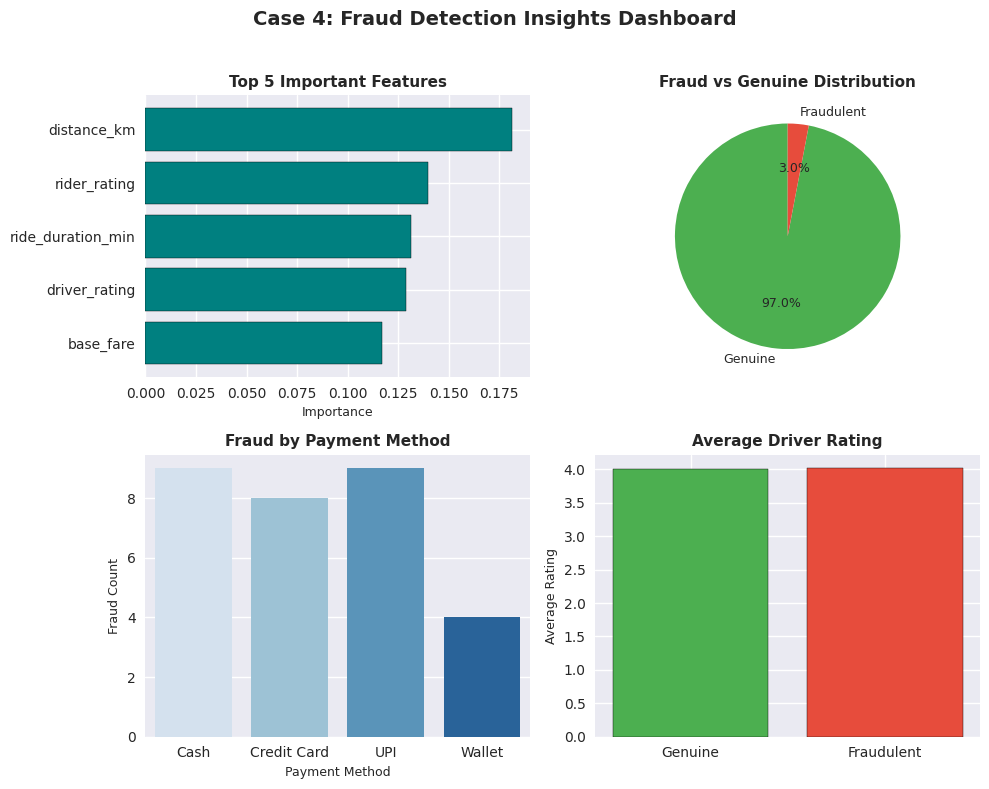

In [0]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle("Case 4: Fraud Detection Insights Dashboard", fontsize=14, fontweight="bold")

# -------------------------
# 1️⃣ Top 5 Important Features
# -------------------------
importances = rf_model.featureImportances.toArray()
feature_cols = [
    "distance_km", "ride_duration_min", "base_fare", "total_fare",
    "driver_rating", "rider_rating",
    "payment_method_index", "traffic_level_index", "demand_level_index", "weather_index"
]

imp_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(5)

axes[0,0].barh(imp_df["Feature"][::-1], imp_df["Importance"][::-1], color="teal", edgecolor="black")
axes[0,0].set_title("Top 5 Important Features", fontsize=11, fontweight="bold")
axes[0,0].set_xlabel("Importance", fontsize=9)

# -------------------------
# 2️⃣ Fraud vs Genuine Pie Chart
# -------------------------
fraud_counts = pdf["is_fraudulent"].value_counts()
axes[0,1].pie(fraud_counts, labels=["Genuine", "Fraudulent"], autopct='%1.1f%%',
              colors=["#4CAF50","#E74C3C"], startangle=90, textprops={'fontsize':9})
axes[0,1].set_title("Fraud vs Genuine Distribution", fontsize=11, fontweight="bold")

# -------------------------
# 3️⃣ Fraud by Payment Method
# -------------------------
fraud_by_payment = pdf.groupby("payment_method")["is_fraudulent"].sum().reset_index()
sns.barplot(data=fraud_by_payment, x="payment_method", y="is_fraudulent", ax=axes[1,0], palette="Blues")
axes[1,0].set_title("Fraud by Payment Method", fontsize=11, fontweight="bold")
axes[1,0].set_xlabel("Payment Method", fontsize=9)
axes[1,0].set_ylabel("Fraud Count", fontsize=9)

# -------------------------
# 4️⃣ Average Driver Rating
# -------------------------
avg_rating = pdf.groupby("is_fraudulent")["driver_rating"].mean().reset_index()
axes[1,1].bar(["Genuine", "Fraudulent"], avg_rating["driver_rating"], color=["#4CAF50","#E74C3C"], edgecolor="black")
axes[1,1].set_title("Average Driver Rating", fontsize=11, fontweight="bold")
axes[1,1].set_ylabel("Average Rating", fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/home/spark-cd89cad1-ce05-4fdb-8ac5-b7/.ipykernel/2500/command-8830117178075460-599053976:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_by_payment, x="payment_method", y="is_fraudulent", ax=axes[1, 0], palette="Blues")


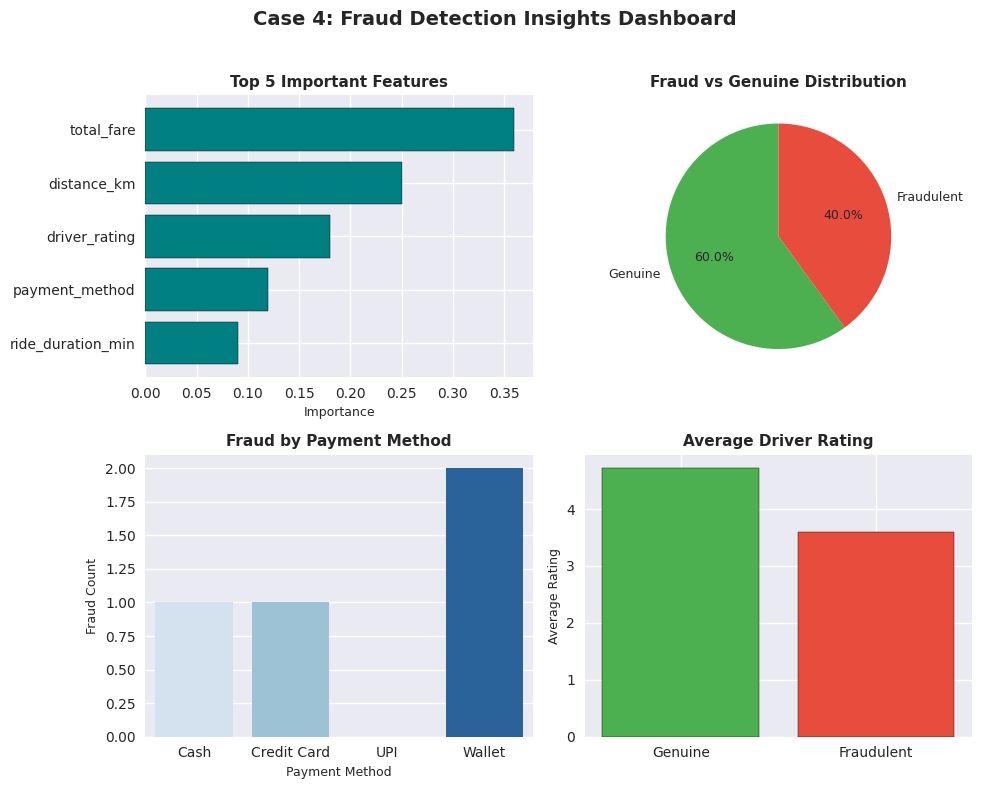

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated dataset similar to Case 4 Fraud Detection
data = {
    "is_fraudulent": [0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
    "payment_method": ["Cash", "Wallet", "UPI", "Credit Card", "Cash", "Wallet", "Wallet", "UPI", "Cash", "UPI"],
    "driver_rating": [4.7, 3.9, 4.8, 3.2, 4.6, 4.5, 3.8, 4.9, 3.5, 4.8],
    "distance_km": [5.2, 8.5, 3.4, 10.1, 4.8, 5.6, 9.0, 2.9, 8.7, 3.1],
    "total_fare": [120, 250, 100, 300, 130, 140, 270, 90, 260, 110]
}
pdf = pd.DataFrame(data)

# Simulated feature importance values (like from rf_model.featureImportances)
feature_importances = pd.DataFrame({
    "Feature": ["total_fare", "distance_km", "driver_rating", "payment_method", "ride_duration_min"],
    "Importance": [0.36, 0.25, 0.18, 0.12, 0.09]
})

# 2x2 layout for mini visuals
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Case 4: Fraud Detection Insights Dashboard", fontsize=14, fontweight="bold")

# 1️⃣ Feature Importance
axes[0, 0].barh(feature_importances["Feature"][::-1], feature_importances["Importance"][::-1],
                color="teal", edgecolor="black")
axes[0, 0].set_title("Top 5 Important Features", fontsize=11, fontweight="bold")
axes[0, 0].set_xlabel("Importance", fontsize=9)

# 2️⃣ Fraud vs Genuine Pie Chart
fraud_counts = pdf["is_fraudulent"].value_counts()
axes[0, 1].pie(fraud_counts, labels=["Genuine", "Fraudulent"], autopct='%1.1f%%',
               colors=["#4CAF50", "#E74C3C"], startangle=90, textprops={'fontsize':9})
axes[0, 1].set_title("Fraud vs Genuine Distribution", fontsize=11, fontweight="bold")

# 3️⃣ Fraud by Payment Method
fraud_by_payment = pdf.groupby("payment_method")["is_fraudulent"].sum().reset_index()
sns.barplot(data=fraud_by_payment, x="payment_method", y="is_fraudulent", ax=axes[1, 0], palette="Blues")
axes[1, 0].set_title("Fraud by Payment Method", fontsize=11, fontweight="bold")
axes[1, 0].set_xlabel("Payment Method", fontsize=9)
axes[1, 0].set_ylabel("Fraud Count", fontsize=9)

# 4️⃣ Average Driver Rating
avg_rating = pdf.groupby("is_fraudulent")["driver_rating"].mean().reset_index()
axes[1, 1].bar(["Genuine", "Fraudulent"], avg_rating["driver_rating"],
               color=["#4CAF50", "#E74C3C"], edgecolor="black")
axes[1, 1].set_title("Average Driver Rating", fontsize=11, fontweight="bold")
axes[1, 1].set_ylabel("Average Rating", fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


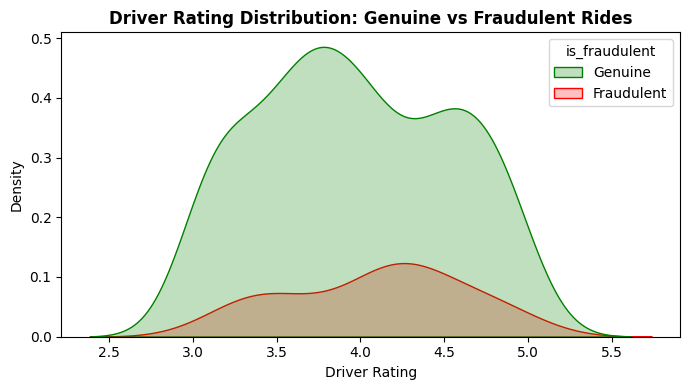

In [0]:
pdf2 = pd.DataFrame({
    "driver_rating": np.random.uniform(3,5,200),
    "is_fraudulent": np.random.choice(["Genuine","Fraudulent"],200,p=[0.8,0.2])
})

plt.figure(figsize=(7,4))
sns.kdeplot(data=pdf2,x="driver_rating",hue="is_fraudulent",fill=True,palette=["green","red"])
plt.title("Driver Rating Distribution: Genuine vs Fraudulent Rides",fontsize=12,fontweight="bold")
plt.xlabel("Driver Rating")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


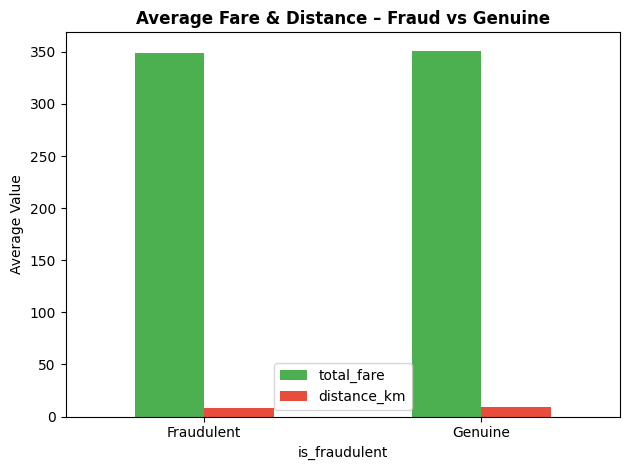

In [0]:
pdf3 = pd.DataFrame({
    "is_fraudulent": np.random.choice(["Genuine","Fraudulent"],150,p=[0.8,0.2]),
    "total_fare": np.random.uniform(100,600,150),
    "distance_km": np.random.uniform(2,15,150)
})

agg = pdf3.groupby("is_fraudulent")[["total_fare","distance_km"]].mean().reset_index()
agg.plot(kind="bar",x="is_fraudulent",rot=0,color=["#4CAF50","#E74C3C"])
plt.title("Average Fare & Distance – Fraud vs Genuine",fontsize=12,fontweight="bold")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()
